<a href="https://colab.research.google.com/github/Leo-Kasper/is310-final-project-leo-kasper/blob/main/text_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk import word_tokenize
from nltk import FreqDist
from nltk.stem import PorterStemmer
porter = PorterStemmer()
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import warnings


In [22]:
df = pd.read_csv("https://raw.githubusercontent.com/ZoeLeBlanc/visualizing_humanities_data_workshop/master/web_scraped_humanist_listserv.csv")

In [37]:
!pip3 install nltk

In [23]:
df = df.iloc[:21]

In [24]:
df

,dates,text
0,1987-1988,From: MCCARTY@UTOREPAS\nSubject: \nDate: 12 Ma...
1,1988-1989,From: Sebastian Rahtz \nSubject: C++ and Gnu o...
2,1989-1990,From: Willard McCarty \nSubject: Happy Birthda...
3,1990-1991,From: Elaine Brennan & Allen Renear \nSubject:...
4,1991-1992,From: Elaine Brennan & Allen Renear \nSubject:...
5,1992-1993,From: Elaine M Brennan \nSubject: Humanist's B...
6,1993-1994,From: 6500card%ucsbuxa@hub.ucsb.edu (Cheryl A....
7,1994-1995,From: Andrew Burday \nSubject: Re: 7.0638 Qs: ...
8,1995-1996,"From: ""Gregory Bloomquist"" \nSubject: Round Ta..."
9,1996-1997,From: Humanist \nSubject: Humanist begins its ...


In [30]:
df['start_yr'] = df['dates'].str.split('-').str[0]
df['end_yr'] = df['dates'].str.split('-').str[1]
df['vol_size'] = df['text'].str.count('\n')

In [31]:
df

,dates,text,start_yr,end_yr,vol_size
0,1987-1988,From: MCCARTY@UTOREPAS\nSubject: \nDate: 12 Ma...,1987,1988,50794
1,1988-1989,From: Sebastian Rahtz \nSubject: C++ and Gnu o...,1988,1989,36109
2,1989-1990,From: Willard McCarty \nSubject: Happy Birthda...,1989,1990,108695
3,1990-1991,From: Elaine Brennan & Allen Renear \nSubject:...,1990,1991,118929
4,1991-1992,From: Elaine Brennan & Allen Renear \nSubject:...,1991,1992,81193
5,1992-1993,From: Elaine M Brennan \nSubject: Humanist's B...,1992,1993,59957
6,1993-1994,From: 6500card%ucsbuxa@hub.ucsb.edu (Cheryl A....,1993,1994,71763
7,1994-1995,From: Andrew Burday \nSubject: Re: 7.0638 Qs: ...,1994,1995,46569
8,1995-1996,"From: ""Gregory Bloomquist"" \nSubject: Round Ta...",1995,1996,61076
9,1996-1997,From: Humanist \nSubject: Humanist begins its ...,1996,1997,52506


In [29]:
def stem_words(row):
    stemmed_words = ''
    for token in row.text.split(' '):
        stemmed_words += porter.stem(token) + ' '
    return stemmed_words

In [32]:
df['stemmed_text'] = df.apply(stem_words,axis=1)

In [33]:
df

,dates,text,start_yr,end_yr,vol_size,stemmed_text
0,1987-1988,From: MCCARTY@UTOREPAS\nSubject: \nDate: 12 Ma...,1987,1988,50794,from: mccarty@utorepas\nsubject: \ndate: 12 ma...
1,1988-1989,From: Sebastian Rahtz \nSubject: C++ and Gnu o...,1988,1989,36109,from: sebastian rahtz \nsubject: c++ and gnu o...
2,1989-1990,From: Willard McCarty \nSubject: Happy Birthda...,1989,1990,108695,from: willard mccarti \nsubject: happi birthda...
3,1990-1991,From: Elaine Brennan & Allen Renear \nSubject:...,1990,1991,118929,from: elain brennan & allen renear \nsubject: ...
4,1991-1992,From: Elaine Brennan & Allen Renear \nSubject:...,1991,1992,81193,from: elain brennan & allen renear \nsubject: ...
5,1992-1993,From: Elaine M Brennan \nSubject: Humanist's B...,1992,1993,59957,from: elain M brennan \nsubject: humanist' bir...
6,1993-1994,From: 6500card%ucsbuxa@hub.ucsb.edu (Cheryl A....,1993,1994,71763,from: 6500card%ucsbuxa@hub.ucsb.edu (cheryl A....
7,1994-1995,From: Andrew Burday \nSubject: Re: 7.0638 Qs: ...,1994,1995,46569,from: andrew burday \nsubject: re: 7.0638 qs: ...
8,1995-1996,"From: ""Gregory Bloomquist"" \nSubject: Round Ta...",1995,1996,61076,"from: ""gregori bloomquist"" \nsubject: round ta..."
9,1996-1997,From: Humanist \nSubject: Humanist begins its ...,1996,1997,52506,from: humanist \nsubject: humanist begin it 10...


In [45]:
documents = df.text.tolist()
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
vectorizer = TfidfVectorizer(max_df=0.5, min_df=1,stop_words=stop_words)

In [49]:
transformed_documents = vectorizer.fit_transform(documents)

transformed_documents_as_array = transformed_documents.toarray()

dates = df.dates.tolist()
tfidf_results = []
for counter, doc in enumerate(transformed_documents_as_array):
    tf_idf_tuples = list(zip(vectorizer.get_feature_names(), doc))
    one_doc_as_df = pd.DataFrame.from_records(tf_idf_tuples, columns=['term', 'score']).sort_values(by='score', ascending=False).reset_index(drop=True)
    one_doc_as_df['dates'] = dates[counter]
    tfidf_results.append(one_doc_as_df)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [50]:
warnings.filterwarnings("ignore")

In [55]:
tfidf_df = pd.concat(tfidf_results)
tfidf_df = tfidf_df.sort_values(by=['score'], ascending=False)
tfidf_df.head()

,term,score,dates
0,ninch,0.841249,2002-2003
0,ninch,0.822897,2000-2001
0,ninch,0.790522,2001-2002
0,utorepas,0.766377,1987-1988
0,ninch,0.671890,1999-2000


In [61]:
tfidf_df.term.unique()
tfidf_df['start_yr'] = tfidf_df['dates'].str.split('-').str[0].astype(int)
tfidf_df['end_yr'] = tfidf_df['dates'].str.split('-').str[1].astype(int)
tfidf_df

,term,score,dates,year_start,year_end,start_yr,end_yr
0,ninch,0.841249,2002-2003,2002,2003,2002,2003
0,ninch,0.822897,2000-2001,2000,2001,2000,2001
0,ninch,0.790522,2001-2002,2001,2002,2001,2002
0,utorepas,0.766377,1987-1988,1987,1988,1987,1988
0,ninch,0.671890,1999-2000,1999,2000,1999,2000
...,...,...,...,...,...,...,...
65250,saab,0.000000,1994-1995,1994,1995,1994,1995
65251,s782293,0.000000,1994-1995,1994,1995,1994,1995
65252,s6,0.000000,1994-1995,1994,1995,1994,1995
65253,s6b,0.000000,1994-1995,1994,1995,1994,1995


In [62]:
#Top 10 unique words for all data
top10_all = tfidf_df.drop_duplicates(subset = 'term', keep = 'first').head(10)
top10_all

,term,score,dates,year_start,year_end,start_yr,end_yr
0,ninch,0.841249,2002-2003,2002,2003,2002,2003
0,utorepas,0.766377,1987-1988,1987,1988,1987,1988
1,amico,0.444180,1999-2000,1999,2000,1999,2000
0,fqs,0.426306,2005-2006,2005,2006,2005,2006
0,wmccarty,0.384587,2007-2008,2007,2008,2007,2008
1,fludd,0.337311,2007-2008,2007,2008,2007,2008
0,google,0.333120,2004-2005,2004,2005,2004,2005
1,elra,0.321378,1997-1998,1997,1998,1997,1998
1,wikipedia,0.316421,2005-2006,2005,2006,2005,2006
0,7848,0.301380,2003-2004,2003,2004,2003,2004


In [63]:
#I found that the term 'web 2.0' was coined in 2004, so that will be our line

In [67]:
#Top 10 unique words for pre-2004
pre_04 = tfidf_df[tfidf_df['end_yr'] < 2004]
top10_pre_04 = pre_04.drop_duplicates(subset = 'term', keep = 'first').head(10)
top10_pre_04

,term,score,dates,year_start,year_end,start_yr,end_yr
0,ninch,0.841249,2002-2003,2002,2003,2002,2003
0,utorepas,0.766377,1987-1988,1987,1988,1987,1988
1,amico,0.444180,1999-2000,1999,2000,1999,2000
1,elra,0.321378,1997-1998,1997,1998,1997,1998
0,ruhc,0.293491,1996-1997,1996,1997,1996,1997
0,ippe,0.260647,1994-1995,1994,1995,1994,1995
0,astra,0.255401,1988-1989,1988,1989,1988,1989
1,vax,0.252890,1988-1989,1988,1989,1988,1989
0,saddam,0.247465,1990-1991,1990,1991,1990,1991
2,ichim99,0.228776,1999-2000,1999,2000,1999,2000


In [69]:
#Top 10 unique words for 2004 and beyond
post_04 = tfidf_df[tfidf_df['end_yr'] >= 2004]
top10_post_04 = post_04.drop_duplicates(subset = 'term', keep = 'first').head(10)
top10_post_04

,term,score,dates,year_start,year_end,start_yr,end_yr
0,fqs,0.426306,2005-2006,2005,2006,2005,2006
0,wmccarty,0.384587,2007-2008,2007,2008,2007,2008
1,fludd,0.337311,2007-2008,2007,2008,2007,2008
0,google,0.333120,2004-2005,2004,2005,2004,2005
1,wikipedia,0.316421,2005-2006,2005,2006,2005,2006
0,7848,0.301380,2003-2004,2003,2004,2003,2004
2,3dx,0.273620,2005-2006,2005,2006,2005,2006
3,mccarty_at_kcl,0.258334,2005-2006,2005,2006,2005,2006
1,tocs,0.253284,2003-2004,2003,2004,2003,2004
4,arundel,0.247852,2005-2006,2005,2006,2005,2006


In [70]:
#Function to plot word freq over time
def plotter(term):
  df['count'] = df['text'].str.lower().str.count(term)
  df.plot(x = 'start_yr', y = 'count', kind = 'line')

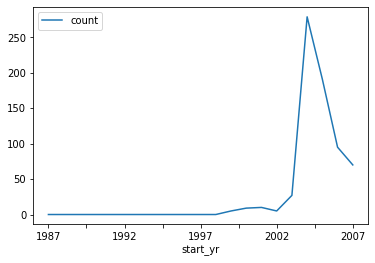

In [71]:
plotter('google')